In [ ]:
# Issues with yahoo finance api. Need to update pandas_datareader Un# the two lines below.
!pip show pandas_datareader
!pip install --upgrade pandas_datareader

Name: pandas-datareader
Version: 0.10.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: /usr/local/lib/python3.10/dist-packages
Requires: lxml, pandas, requests
Required-by: 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from pylab import plt, mpl

#sdate = "2011/01/01"
#edate = "2022/02/10"


In [ ]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

<ipython-input-3-d0022a692ee2>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
#data = web.DataReader('^GSPC', 'yahoo', sdate, edate)
#data = data.dropna()

In [ ]:
!pip install yfinance
import yfinance as yf
yf.pdr_override()
sdate = "2000-01-01"
edate = "2023-05-17"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data = web.get_data_yahoo('^GSPC', sdate, edate) # SP500 index
data = data.dropna() #dropping missing points

[*********************100%***********************]  1 of 1 completed


In [ ]:
print(data.columns);print(data.index)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2023-05-03', '2023-05-04', '2023-05-05', '2023-05-08',
               '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12',
               '2023-05-15', '2023-05-16'],
              dtype='datetime64[ns]', name='Date', length=5880, freq=None)


In [ ]:
SPX_P = data["Adj Close"]
type(SPX_P)

pandas.core.series.Series

In [ ]:
data['rets'] = np.log(SPX_P / SPX_P.shift(1))

In [ ]:
data['vol_r'] = data['rets'].rolling(252).std()* np.sqrt(252)

In [ ]:
Rvol = data["vol_r"]
data['dvol_r'] = np.log(Rvol / Rvol.shift(1))

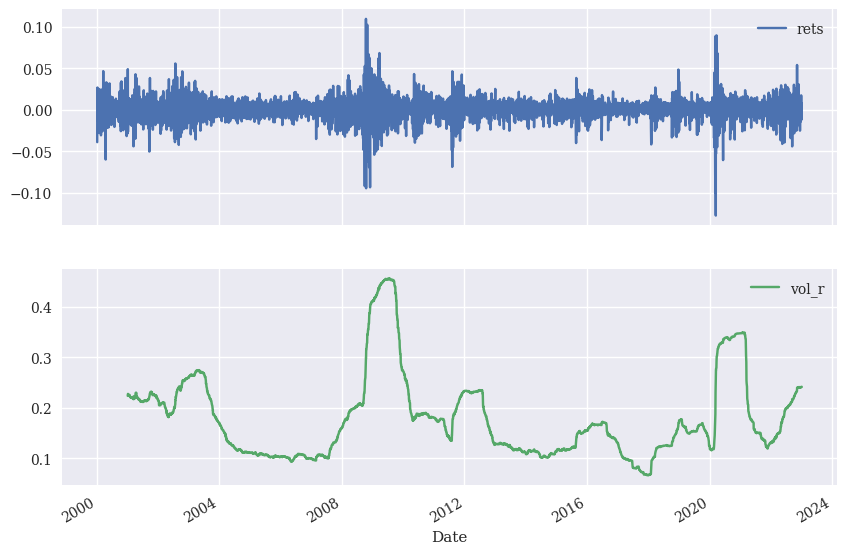

In [ ]:
data[['rets', 'vol_r']].plot(subplots=True, figsize=(10,7));

In [ ]:
data['rets_1yr_nxt'] = np.log(SPX_P.shift(-252) / SPX_P)

In [ ]:
data = data.dropna()

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,rets,vol_r,dvol_r,rets_1yr_nxt
Date,,,,,,,,,,
2001-01-03,1283.270020,1347.760010,1274.619995,1347.560059,1347.560059,1880700000,0.048884,0.225893,0.009113,-0.154074
2001-01-04,1347.560059,1350.239990,1329.140015,1333.339966,1333.339966,2131000000,-0.010609,0.226125,0.001027,-0.142246
2001-01-05,1333.339966,1334.770020,1294.949951,1298.349976,1298.349976,1430800000,-0.026593,0.227657,0.006750,-0.125166
2001-01-08,1298.349976,1298.349976,1276.290039,1295.859985,1295.859985,1115500000,-0.001920,0.226038,-0.007138,-0.129542
2001-01-09,1295.859985,1311.719971,1295.140015,1300.800049,1300.800049,1191300000,0.003805,0.225780,-0.001139,-0.126536
...,...,...,...,...,...,...,...,...,...,...
2021-12-29,4788.640137,4804.060059,4778.080078,4793.060059,4793.060059,2963310000,0.001401,0.131072,-0.000298,-0.219283
2021-12-30,4794.229980,4808.930176,4775.330078,4778.729980,4778.729980,3124950000,-0.002994,0.131133,0.000460,-0.218833
2021-12-31,4775.209961,4786.830078,4765.750000,4766.180176,4766.180176,2677820000,-0.002630,0.131068,-0.000492,-0.220212


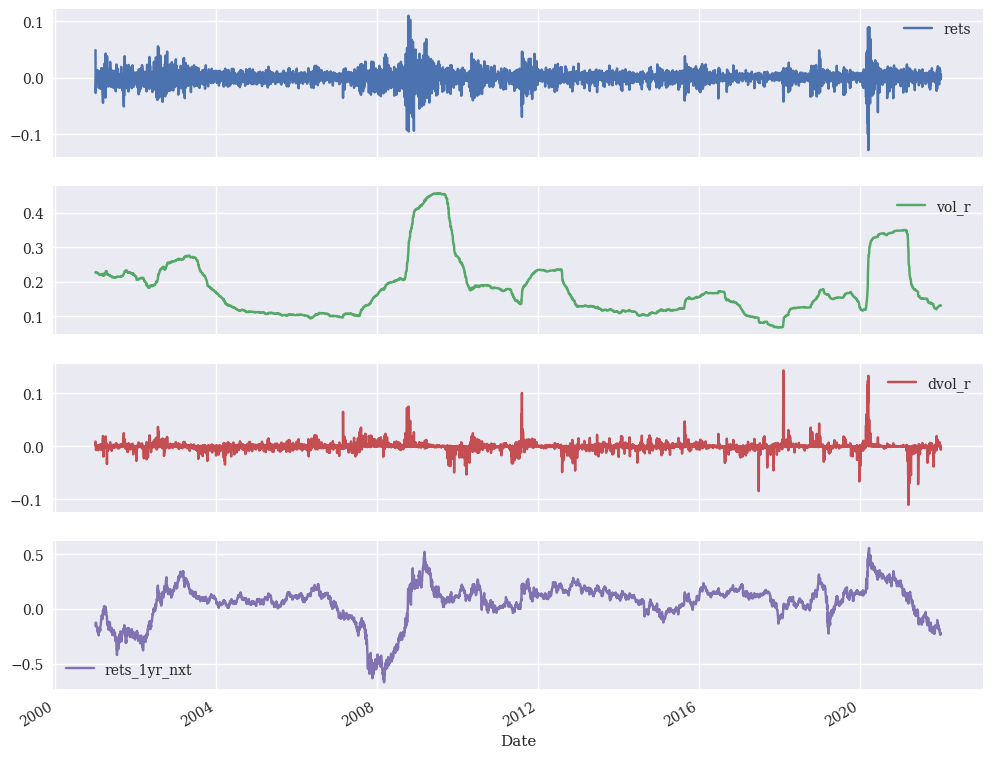

In [ ]:
data[['rets', 'vol_r','dvol_r','rets_1yr_nxt']].plot(subplots=True, figsize=(12,10));

In [ ]:
import scipy.stats

In [ ]:
scipy.stats.pearsonr(data['vol_r'].values,data['rets'].values)

PearsonRResult(statistic=0.012428026195353431, pvalue=0.3663593303734554)

In [ ]:
scipy.stats.pearsonr(data['vol_r'].values,data['rets_1yr_nxt'].values)

PearsonRResult(statistic=0.24260711190052117, pvalue=1.1590613112846574e-71)

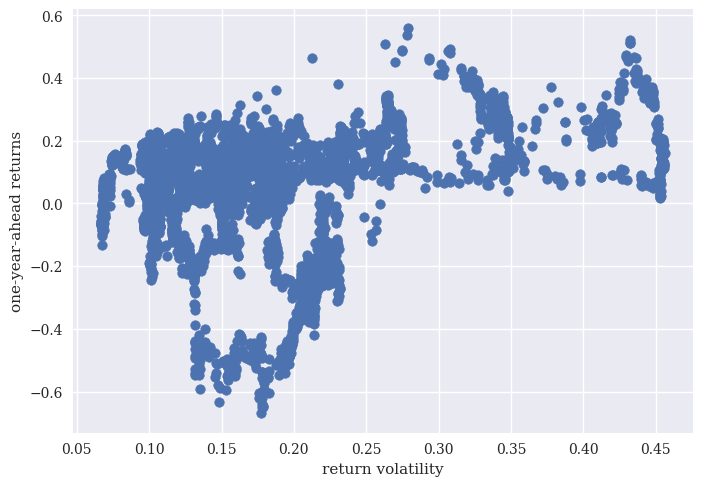

In [ ]:
plt.scatter(data['vol_r'].values,data['rets_1yr_nxt'].values)
plt.xlabel("return volatility")
plt.ylabel("one-year-ahead returns")
plt.show()

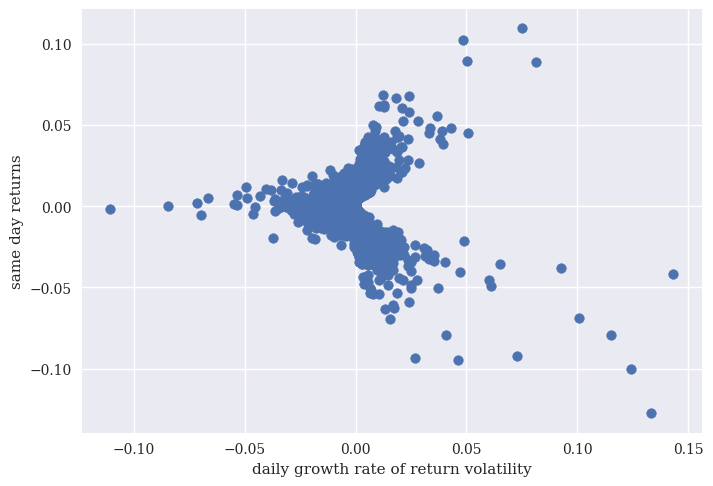

In [ ]:
plt.scatter(data['dvol_r'].values,data['rets'].values)
plt.xlabel("daily growth rate of return volatility")
plt.ylabel("same day returns")
plt.show()

Try a support vector machine learning algorithm

In [ ]:
lags = 12

cols = []
for lag in range(1, lags+1):
  col = 'lag_{}'.format(lag)
  data[col] = np.sign(data['rets'].shift(lag))
  cols.append(col)
data.dropna(inplace=True)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(gamma='auto')
model2 = SVC(gamma='auto')
model3 = SVC(gamma='auto')

In [ ]:
X = data.loc[:,cols]
X.loc[:,'vol1d'] = data.loc[:,'vol_r']
#Alternatively, one can use the below with some caveats.
#X = data[cols]
#X['vol1d'] = data['vol_r']

X

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,vol1d
Date,,,,,,,,,,,,,
2001-01-22,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,0.225688
2001-01-23,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,0.224347
2001-01-24,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,0.224282
2001-01-25,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,0.224297
2001-01-26,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,0.224271
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-29,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,0.131072
2021-12-30,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,0.131133
2021-12-31,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,0.131068


In [ ]:
model.fit(X,np.sign(data['rets']))

SVC(gamma='auto')

In [ ]:
data['Prediction']=model.predict(X)

In [ ]:
model2.fit(data[cols],np.sign(data['rets']))

SVC(gamma='auto')

In [ ]:
data['Prediction2']=model2.predict(data[cols])

In [ ]:
data['Strategy'] = data['Prediction'] * data['rets']
data['Strategy2'] = data['Prediction2'] * data['rets']

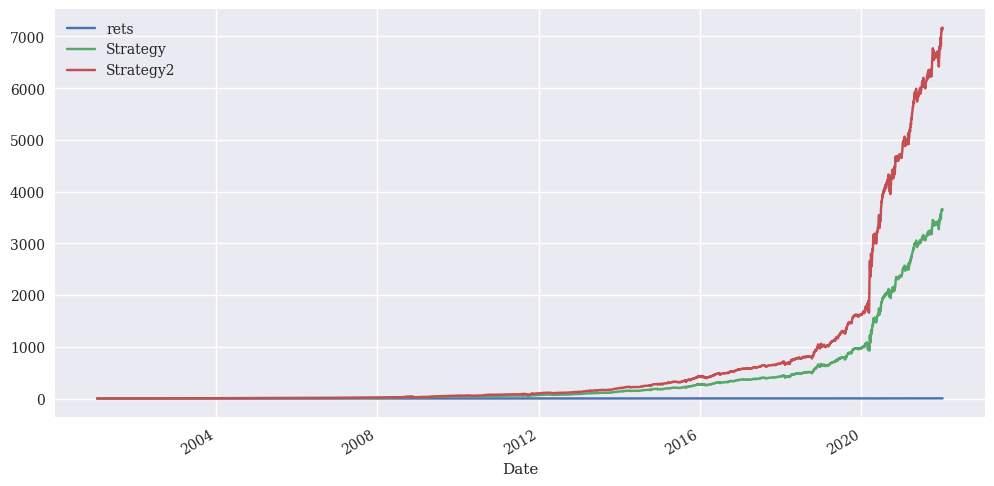

In [ ]:
data[['rets','Strategy','Strategy2']].cumsum().apply(np.exp).plot(figsize=(12,6));

In [ ]:
strdiff = data['Strategy2']-data['Strategy']

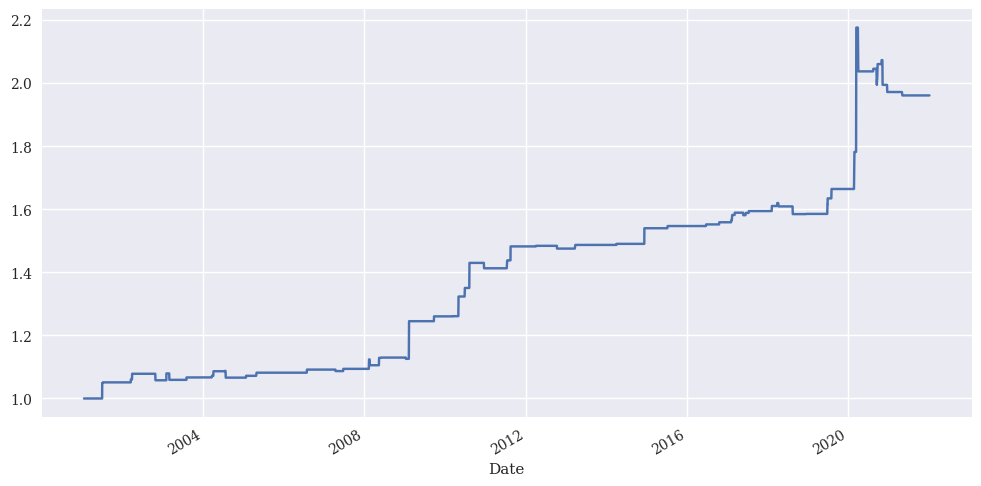

In [ ]:
strdiff.cumsum().apply(np.exp).plot(figsize=(12,6));

In [ ]:
data['Prediction2']

Date
2001-01-22    1.0
2001-01-23   -1.0
2001-01-24    1.0
2001-01-25   -1.0
2001-01-26    1.0
             ... 
2021-12-29    1.0
2021-12-30    1.0
2021-12-31    1.0
2022-01-03    1.0
2022-01-04   -1.0
Name: Prediction2, Length: 5273, dtype: float64

In [ ]:
data['Prediction']

Date
2001-01-22    1.0
2001-01-23   -1.0
2001-01-24    1.0
2001-01-25   -1.0
2001-01-26    1.0
             ... 
2021-12-29    1.0
2021-12-30    1.0
2021-12-31    1.0
2022-01-03    1.0
2022-01-04   -1.0
Name: Prediction, Length: 5273, dtype: float64

<Axes: xlabel='Date'>

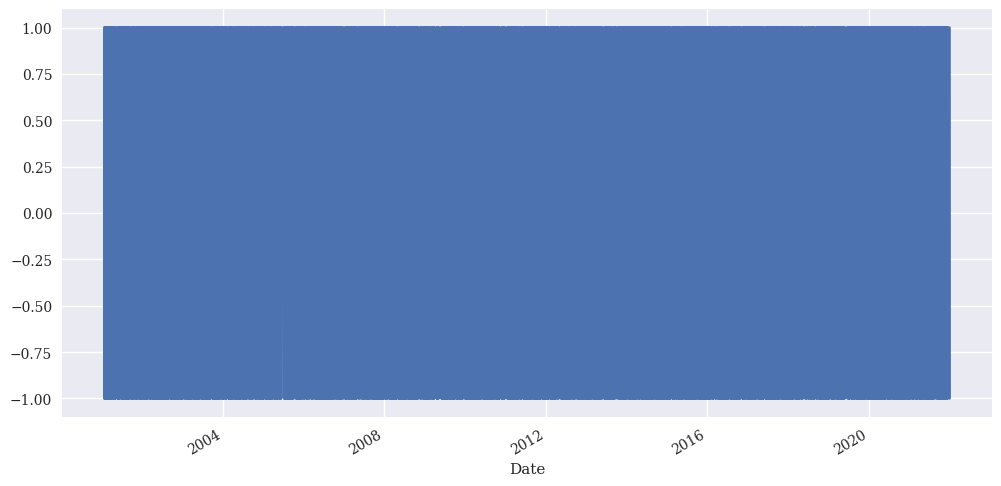

In [ ]:
data['Prediction2'].plot(figsize=(12,6))

In [ ]:
# Training vs Testging Sets


In [ ]:
Y = np.sign(data['rets'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into train and test with 90 & 10 % respectively
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [ ]:
model3.fit(x_train,y_train)

SVC(gamma='auto')

In [ ]:
data['Prediction3']=model3.predict(X)

In [ ]:
data['Strategy3'] = data['Prediction3'] * data['rets']

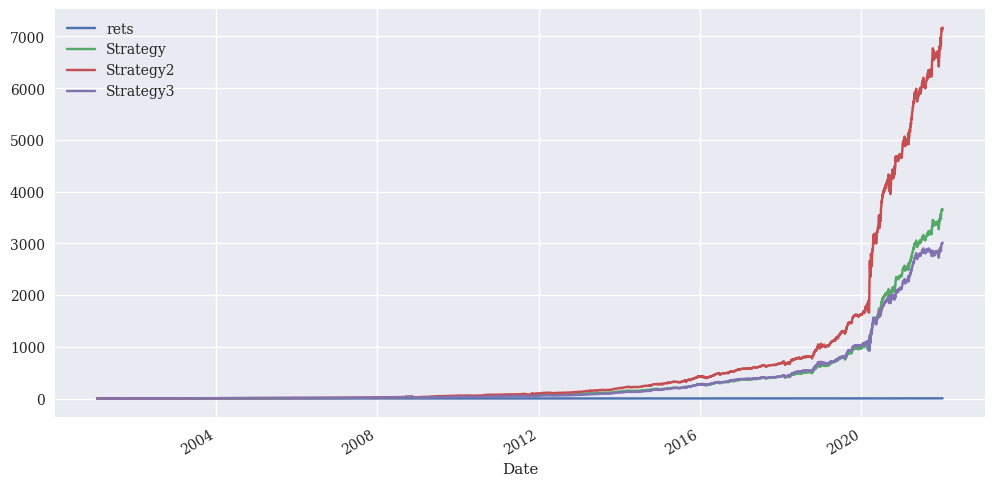

In [ ]:
data[['rets','Strategy','Strategy2','Strategy3']].cumsum().apply(np.exp).plot(figsize=(12,6));

In [ ]:
data['Prediction3']

Date
2001-01-22    1.0
2001-01-23   -1.0
2001-01-24    1.0
2001-01-25   -1.0
2001-01-26    1.0
             ... 
2021-12-29    1.0
2021-12-30   -1.0
2021-12-31    1.0
2022-01-03    1.0
2022-01-04   -1.0
Name: Prediction3, Length: 5273, dtype: float64